In [1]:
import numpy as np
import matplotlib.pyplot as plt
import os 
import pandas as pd 

In [14]:
%matplotlib notebook

In [16]:
def smooth(scalars, weight=0.6):  # Weight between 0 and 1
    last = scalars[0]  # First value in the plot (first timestep)
    smoothed = list()
    for point in scalars:
        smoothed_val = last * weight + (1 - weight) * point  # Calculate smoothed value
        smoothed.append(smoothed_val)                        # Save it
        last = smoothed_val                                  # Anchor the last smoothed value

    return smoothed

In [38]:
def plot_scalar(scalar, smoothing=0.6, index=0):
    smoothed = smooth(scalar, smoothing)
    index = str(index)
    plt.plot(scalar, 'C' + index, label=index)
    plt.plot(smoothed, 'C' + index, alpha=0.3)
    plt.legend()

In [32]:
def plot_scalars(scalars, smoothing=0.6):
    for i, scalar in enumerate(scalars):
        plot_scalar(scalar, index=i)

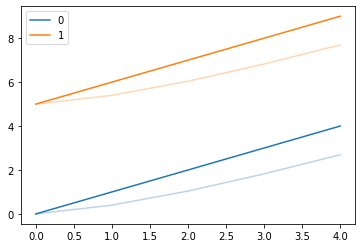

In [41]:
scalar = [0,1,2,3,4]
scalar_2 = [5, 6, 7, 8 ,9]

scalars = [scalar, scalar_2]

# plot_scalar(scalar)

plot_scalars(scalars)

<IPython.core.display.Javascript object>


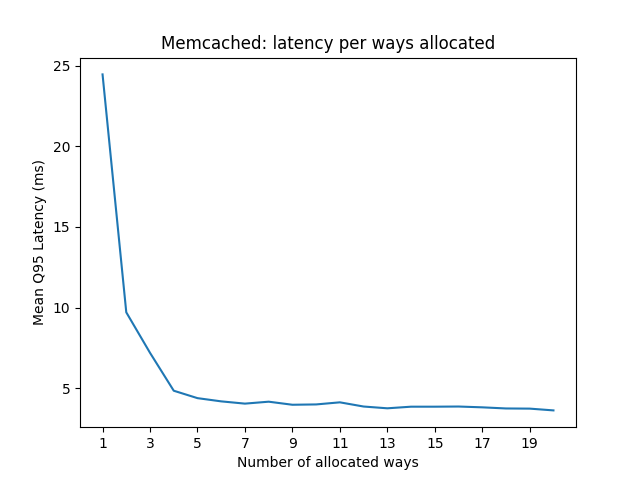

Text(0.5, 1.0, 'Memcached: latency per ways allocated')

In [54]:
mean_latency = [24.46, 9.71, 7.2, 4.85, 4.39, 4.19, 4.05, 4.17, 3.98, 4, 4.13, 3.87, 3.76, 3.86, 3.86, 3.87, 3.82, 3.75, 3.74, 3.63]
ways = list(range(1, 21))

plt.plot(ways, mean_latency)
plt.xticks(np.arange(min(ways), max(ways)+1, 2))
plt.xlabel("Number of allocated ways")
plt.ylabel("Mean Q95 Latency (ms)")
plt.title("Memcached: latency per ways allocated")

In [218]:
def read_data(pwd, smoothing=0.6, action=False, index='Step'):
    dataframes = []
    for root,dirs,files in os.walk(pwd):
        my_files = files.sort()
        for i, file in enumerate(files):
            print(file)
            if file.endswith(".csv"):
                data = pd.read_csv(pwd+file)[[index, 'Value']]
                data['Tag'] = i
                if action:
                    data['Value'] = data['Value'] + 1
                df = data.pivot(index=index, columns='Tag', values=['Value'])
                smoothed = df.ewm(alpha=(1 - smoothing)).mean()
                dataframes.append(smoothed)   

    df_all = pd.concat(dataframes)      


    # df['Smoothed'] = smooth(df['Value'].tolist(), weight=smoothing)
    # df_values = df.pivot(index='Step', columns='Tag', values='Value')
    # df_values.plot(alpha=0.3)


    #smoothed[df.isnull()] = np.nan
    return df_all

run-Aug21_23-02-22_broady3_in-memory_MPKI-tag-Agent_Action.csv
run-Aug22_01-04-13_broady3_in-memory_IPC-tag-Agent_Action.csv
run-Aug22_02-36-52_broady3_in-memory_Bandwidth-tag-Agent_Action.csv
run-Aug22_17-07-21_broady3_in-memory_50ms_0.001decay-tag-Agent_Action.csv


<IPython.core.display.Javascript object>


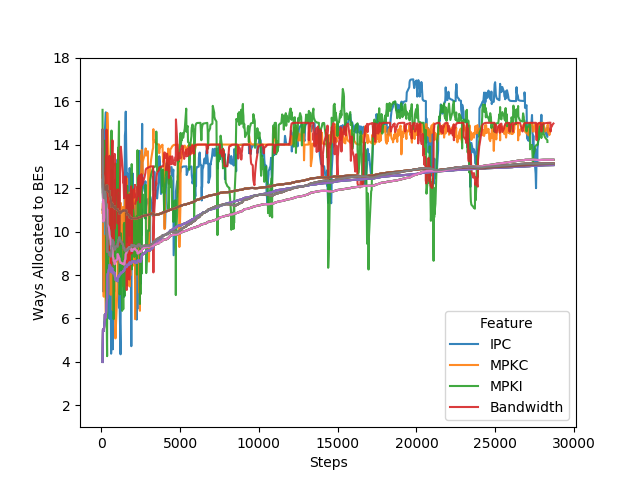

In [122]:
pwd = "/home/nikmand/Downloads/thesis_runs_data/study_feature/"

df = read_data(pwd, action=True)

ax = df.plot(alpha=0.9)
plt.xlabel("Steps")
plt.ylabel("Ways Allocated to BEs")
#plt.title("Memcached: latency per ways allocated")
ax.set_ylim([1,18])
ax.legend(["IPC", "MPKC", "MPKI", "Bandwidth"], title='Feature')

run-Aug24_15-16-48_broady3_graphs_q.99_coeff4-tag-Agent_Action.csv
run-Aug24_16-15-58_broady3_graphs_q.99-tag-Agent_Action.csv
run-Aug24_17-29-37_broady3_graphs_50ms_0.001decay-tag-Agent_Action.csv
run-Aug24_18-33-59_broady3_graphs_q.90-tag-Agent_Action.csv


<IPython.core.display.Javascript object>


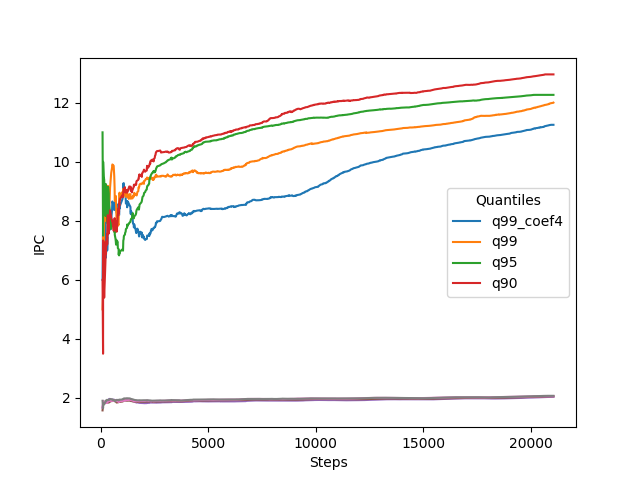

In [160]:
pwd = "/home/nikmand/Downloads/thesis_runs_data/study_quantile/graphs_action_comparison/"

smoothed = read_data(pwd, 0.999, action=True)

plt.subplot(1,1,1)
plt.plot(smoothed)
plt.xlabel("Steps")
plt.ylabel("Ways Allocated to BEs")
#plt.title("Memcached: latency per ways allocated")
# ax.set_ylim([1,18])
plt.legend(["q99_coef4", "q99", "q95", "q90"], title='Quantiles')
plt.show()

run-Aug24_15-16-48_broady3_graphs_q.99_coeff4-tag-Best Effort_IPC.csv
run-Aug24_16-15-58_broady3_graphs_q.99-tag-Best Effort_IPC.csv
run-Aug24_17-29-37_broady3_graphs_50ms_0.001decay-tag-Best Effort_IPC.csv
run-Aug24_18-33-59_broady3_graphs_q.90-tag-Best Effort_IPC.csv


<IPython.core.display.Javascript object>


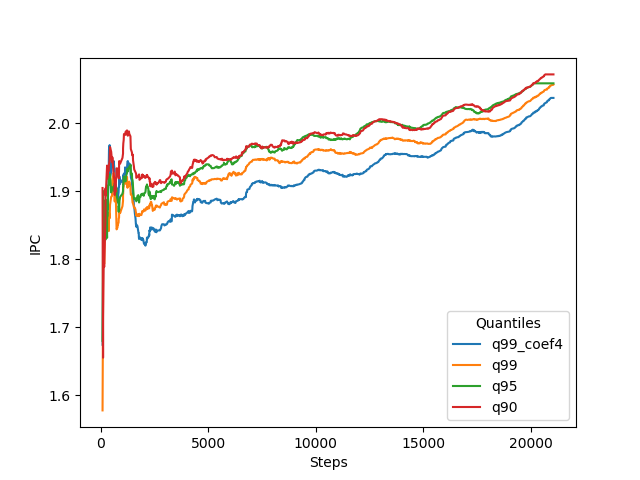

In [212]:
pwd = "/home/nikmand/Downloads/thesis_runs_data/study_quantile/graphs_ipc_comparison/"

smoothed = read_data(pwd, 0.999)

plt.subplot(1,1,1)
plt.plot(smoothed)
plt.xlabel("Steps")
plt.ylabel("IPC")
#plt.title("Memcached: latency per ways allocated")
#ax.set_ylim([1,2.5])
plt.legend(["q99_coef4", "q99", "q95", "q90"], title='Quantiles')
plt.show()

.~lock.run-Aug23_08-21-46_broady3_measurement_action_-1_graphs-tag-Latency Critical_Latency.csv#
run-Aug22_16-29-37_broady3_graphs_50ms_0.001decay-tag-Latency Critical_Latency.csv
run-Aug23_08-21-46_broady3_measurement_action_-1_graphs-tag-Latency Critical_Latency.csv


<IPython.core.display.Javascript object>


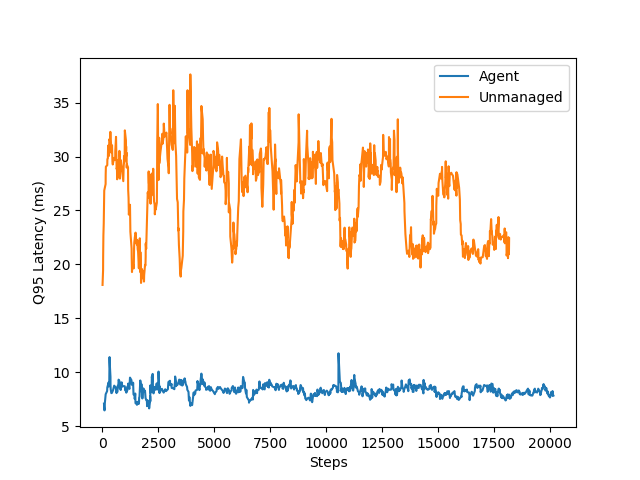

In [234]:
pwd = "/home/nikmand/Downloads/thesis_runs_data/study_coex/agent_vs_unmanaged_graphs/"

smoothed = read_data(pwd, 0.6, index='Step')

plt.subplot(1,1,1)
plt.plot(smoothed)
plt.xlabel("Steps")
plt.ylabel("Q95 Latency (ms)")
#plt.title("Memcached: latency per ways allocated")
#ax.set_ylim([1,2.5])
plt.legend(["Agent", "Unmanaged"])
plt.show()

run-Aug23_09-23-29_broady3_GradientBoostedTreeRegressor-tag-Latency Critical_Latency.csv
run-Aug23_10-11-29_broady3_measurement_action_-1_GradientBoostedTreeRegressor-tag-Latency Critical_Latency.csv


<IPython.core.display.Javascript object>


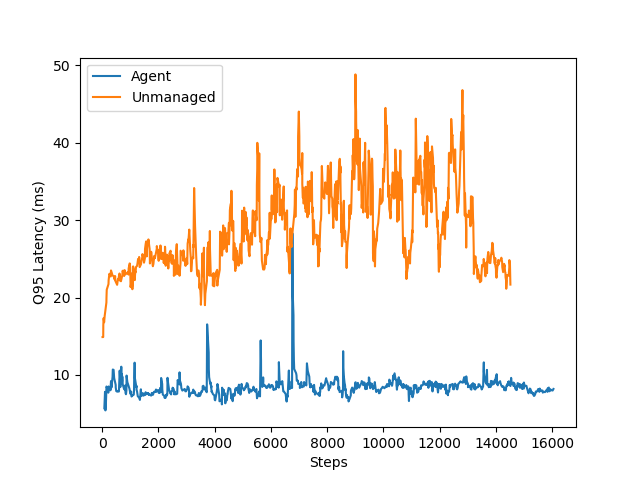

In [235]:
pwd = "/home/nikmand/Downloads/thesis_runs_data/study_coex/agent_vs_unmanaged_gb/"

smoothed = read_data(pwd, 0.6)

plt.subplot(1,1,1)
plt.plot(smoothed)
plt.xlabel("Steps")
plt.ylabel("Q95 Latency (ms)")
#plt.title("Memcached: latency per ways allocated")
#ax.set_ylim([1,2.5])
#plt.hlines(10, 0, 16000, color='r')
#plt.axhline(10,  color='r')
plt.legend(["Agent", "Unmanaged"])
plt.show()

run-Aug23_08-21-46_broady3_measurement_action_-1_graphs-tag-Latency Critical_Bandwidth L..csv
run-Aug23_08-58-07_broady3_measurement_action_-1_in-memory-tag-Latency Critical_Bandwidth L..csv


<IPython.core.display.Javascript object>


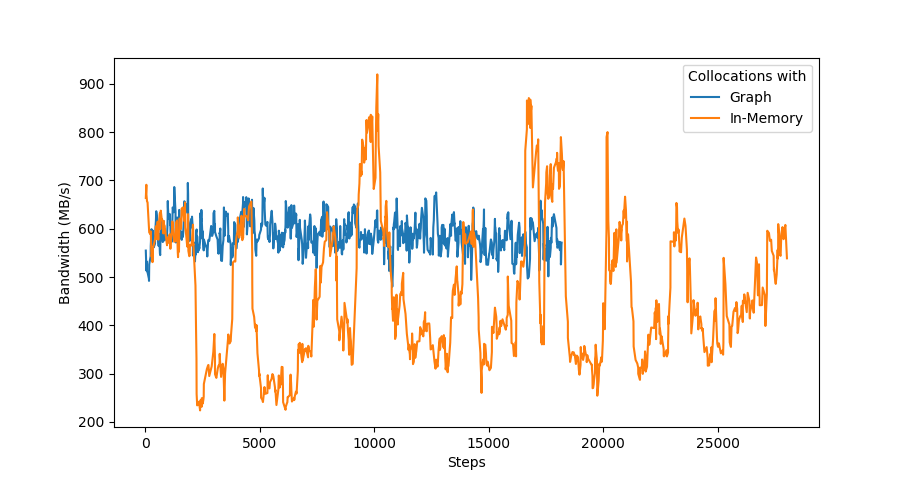

In [240]:
pwd = "/home/nikmand/Downloads/thesis_runs_data/study_coex/bandwidth_-1_for_graphs_in-memory/"


smoothed = read_data(pwd, 0.6)

plt.subplot(1,1,1)
plt.plot(smoothed)
plt.xlabel("Steps")
plt.ylabel("Bandwidth (MB/s)")
#plt.title("Memcached: latency per ways allocated")
#ax.set_ylim([1,2.5])
#plt.hlines(10, 0, 16000, color='r')
#plt.axhline(10,  color='r')
plt.legend(["Graph", "In-Memory"], title='Collocations with')
plt.show()

<IPython.core.display.Javascript object>


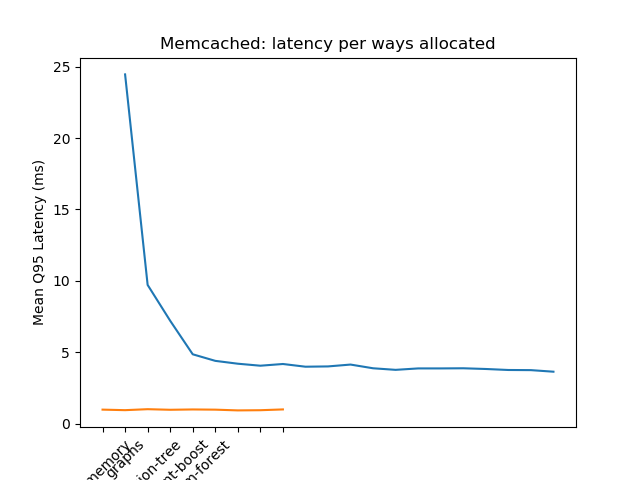

Text(0.5, 1.0, 'Memcached: latency per ways allocated')

In [253]:
mean_latency = []
ways = list(range(1, 21))

bes_list = ['in-memory', 'graphs', 'decision-tree', 'gradient-boost', 'random-forest']

fig, ax = plt.subplots()
plt.plot(ways, mean_latency)
plt.xticks(range(0, 9), bes_list, rotation=45) 
#ax.set_xticklabels(bes_list)
           
plt.xlabel("Number of allocated ways")
plt.ylabel("Mean Q95 Latency (ms)")
plt.title("Memcached: latency per ways allocated")

In [380]:
def autolabel(ax, bs=100, ts=0, plot_type='bar'):
    """Attach a text label foreach each bar in *rects*"""
    rects = ax.patches
    for rect in rects:
#         if label < 0.01:
#             continue
        #print(rect)
        height = rect.get_height()
        label = height
        if label <=0.01:
            continue
        if height > bs and height < ts:
            height = bs
        width = rect.get_width()
        if plot_type == 'bar':
            xy = (rect.get_x() + width / 2,  height)
            va = 'bottom'
            offset = (0, 0)
            size = 'medium'
        else:
            print('oppp')
#             xy = (width, rect.get_y())
#             va = 'baseline'
#             offset = (18, 2)
            size = 'small'
        ax.annotate('{:.2f}%'.format(label), xy=xy, xytext=offset, textcoords="offset points", ha='center', va=va, size=size, rotation=0)

<IPython.core.display.Javascript object>


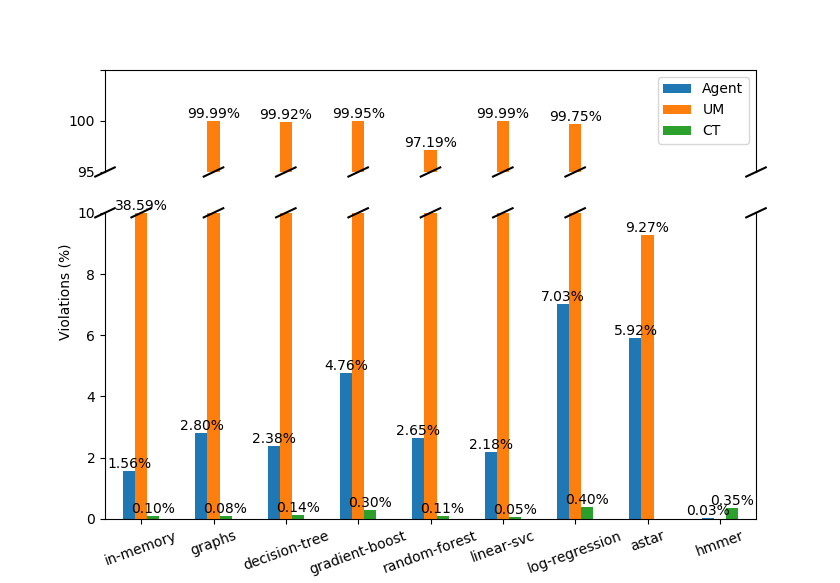

In [445]:
ct = [0.1, 0.08, 0.14, 0.3, 0.11, 0.05, 0.4, 0, 0.35]
unmanaged = [38.59, 99.99, 99.92, 99.95, 97.19, 99.99, 99.75, 9.27]
agent = [1.56, 2.80, 2.38, 4.76, 2.65, 2.18, 7.03, 5.92, 0.03]

groups = [agent, unmanaged, ct]
group_labels = ['Agent', 'UM', 'CT']
bes_names = ['in-memory', 'graphs', 'decision-tree', 'gradient-boost',
             'random-forest', 'linear-svc', 'log-regression', 'astar', 'hmmer']

# Convert data to pandas DataFrame.
df = pd.DataFrame(groups, index=group_labels, columns=bes_names ).T

scale_coef = 3 
grid = {'height_ratios': [1, scale_coef]}
fig, (ax1,ax2) = plt.subplots(2, 1, sharex=True, gridspec_kw=grid)

ax1.spines['bottom'].set_visible(False)
ax1.tick_params(axis='x', which='both',bottom=False)
ax2.spines['top'].set_visible(False)

bs = 10
ts = 95

ax2.set_ylim(0, bs)

ax1.set_ylim(ts, 105)
ax1.set_yticklabels([95, 100])

bars1 = df.plot.bar(ax=ax1, rot=20)
bars2 = df.plot.bar(ax=ax2, rot=20)

# for tick in ax2.get_xticklabels():
#     tick.set_rotation(0)

ax2.get_legend().remove()
autolabel(ax1)
autolabel(ax2, bs, ts)


d = .015 
kwargs = dict(transform=ax1.transAxes, color='k', clip_on=False)
ax1.plot((-d, +d), (-scale_coef*d, +scale_coef*d), **kwargs)      
ax1.plot((1 - d, 1 + d), (-scale_coef*d, +scale_coef*d), **kwargs)
kwargs.update(transform=ax2.transAxes)  
ax2.plot((-d, +d), (1 - d, 1 + d), **kwargs)  
ax2.plot((1 - d, 1 + d), (1 - d, 1 + d), **kwargs)

for b1, b2 in zip(ax1.patches, ax2.patches):
    
    posx = b2.get_x() + b2.get_width()/2.
    if b2.get_height() > bs:
        ax2.plot((posx-9*d, posx+9*d), (1 - d, 1 + d), color='k', clip_on=False,
                 transform=ax2.get_xaxis_transform())
        
    if b1.get_height() > ts:
        ax1.plot((posx-9*d, posx+9*d), (- 3*d, + 3*d), color='k', clip_on=False,
                 transform=ax1.get_xaxis_transform())

fig.text(0.07, 0.5, 'Violations (%)', va='center', rotation='vertical')
plt.show()

In [482]:
def autolabel_time(ax):
    """Attach a text label foreach each bar in *rects*"""
    rects = ax.patches
    for rect in rects:
#         if label < 0.01:
#             continue
        #print(rect)
        height = rect.get_height()
        label = height
        if label <=0.01:
            continue

        width = rect.get_width()

        xy = (rect.get_x() + width / 2,  height + 0.05)
        va = 'bottom'
        offset = (0, 0)
        size = 'medium'
        
        hours = int(label) 
        res = (label % 1) * 60
        minutes = int(res) 
        seconds = int((res % 1) * 60)
        
        if hours == 0:
            format_text = '{}m{}s'
            tuple_time = (minutes, seconds)
        else:
            format_text = '{}h{}m{}s'
            tuple_time = (hours, minutes, seconds)
        
        ax.annotate(format_text.format(*tuple_time), xy=xy, xytext=offset, textcoords="offset points", ha='center', va=va, size=size, rotation=90)

<IPython.core.display.Javascript object>


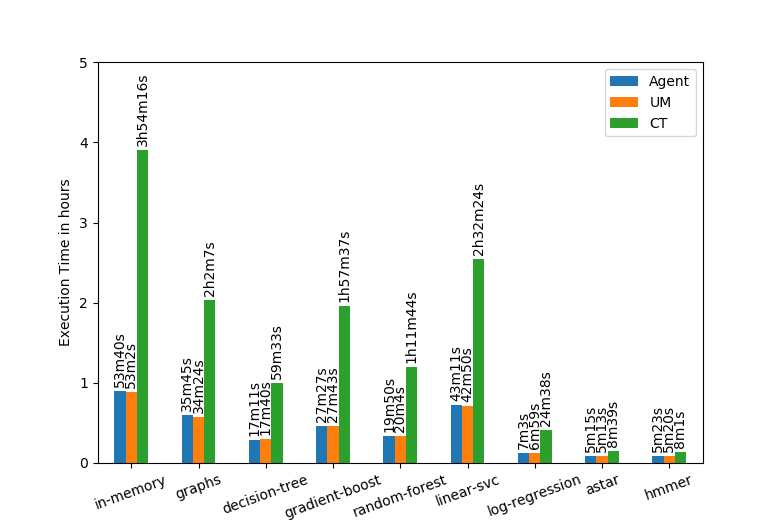

In [483]:
ct = [14056,7327,3574,7057, 4305,9144,1479,519,482]
um = [3183, 2065, 1060, 1664, 1205, 2571, 419, 313, 320]
agent = [3221, 2146, 1031, 1647, 1191, 2591, 424, 316, 324]

sec = 60 * 60

ct[:] = [x / sec for x in ct]
um[:] = [x / sec for x in um]
agent[:] = [x / sec for x in agent]

groups = [agent, um, ct]
group_labels = ['Agent', 'UM', 'CT']
bes_names = ['in-memory', 'graphs', 'decision-tree', 'gradient-boost',
             'random-forest', 'linear-svc', 'log-regression', 'astar', 'hmmer']

# Convert data to pandas DataFrame.
df = pd.DataFrame(groups, index=group_labels, columns=bes_names ).T

ax = df.plot.bar(rot=20)
ax.set_ylim(0, 5)
plt.ylabel("Execution Time in hours")
autolabel_time(ax)


plt.show()

<IPython.core.display.Javascript object>


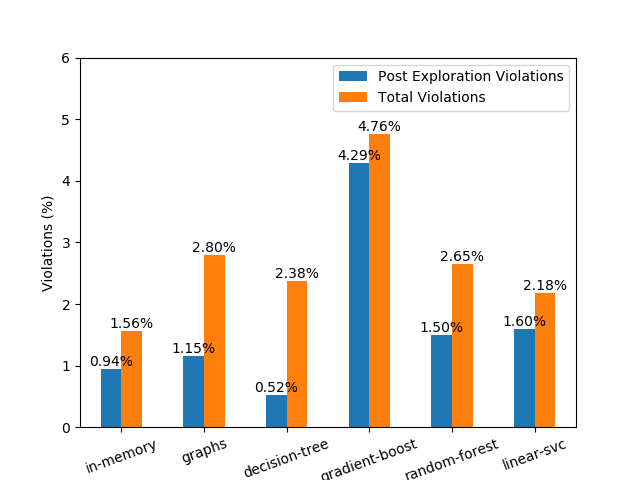

In [490]:
agent = [1.56, 2.80, 2.38, 4.76, 2.65, 2.18]
agent_post_exploration = [0.94, 1.15, 0.52, 4.29, 1.5, 1.6]

groups = [agent_post_exploration, agent]
group_labels = ['Post Exploration Violations', 'Total Violations']
bes_names = ['in-memory', 'graphs', 'decision-tree', 'gradient-boost',
             'random-forest', 'linear-svc']

# Convert data to pandas DataFrame.
df = pd.DataFrame(groups, index=group_labels, columns=bes_names ).T

ax = df.plot.bar(rot=20)
#ax.get_legend().set_title('Agent')
ax.set_ylim(0, 6)

autolabel(ax)

#fig.text(0.07, 0.5, 'Violations (%)', va='center', rotation='vertical')
plt.ylabel("Violations (%)")
plt.show()

<IPython.core.display.Javascript object>


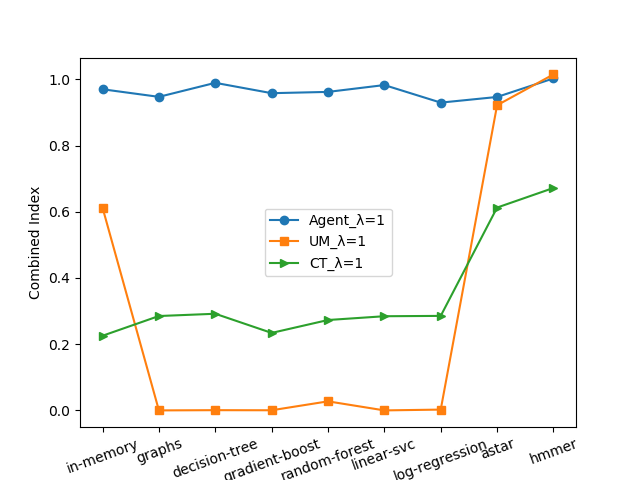

In [461]:
agent_l = [0.970035889475318, 0.947088536812675,0.989455868089234,0.958182635094111,0.962056675062972,
           0.982730451563103, 0.9297, 0.946754430379747, 1.00278549382716]

ct_l = [0.225585230506545,
0.285154524361949,
0.291980134303302,
0.234097916961882,
0.273102276422764,
0.284525207786527,
0.285533468559838,
0.61271676300578,
0.671913900414938
]

um_l = [0.612363619227144,
0.000101259079903,
0.000788679245283,
0.000497896634615,
0.027447053941909,
0.000101244651887,
0.002529832935561,
0.921793610223642,
1.0149140625
]


bes_list = ['in-memory', 'graphs', 'decision-tree', 'gradient-boost', 'random-forest', 'linear-svc', 'log-regression', 'astar', 'hmmer']

plt.plot(agent_l, label='Αgent_λ=1', marker='o')
plt.plot(um_l, label='UM_λ=1', marker="s")
plt.plot(ct_l, label='CT_λ=1', marker=">")
plt.legend(loc="best")

plt.xticks(range(0, 9), bes_list, rotation=20) 
plt.ylabel("Combined Index")
plt.show()

<IPython.core.display.Javascript object>


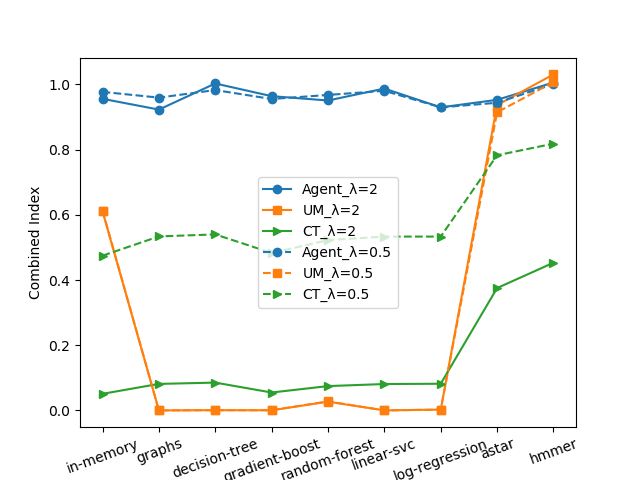

In [462]:
agent_l2 = [0.955881376341093,
0.922815531442359,
1.00289173826697,
0.964000380298082,
0.950747864440906,
0.987281885534063,
0.9297,
0.95274654702772,
1.00588051078342
]

agent_l05 = [0.977191552153161,
0.959463421805084,
0.982805585265321,
0.955286942056485,
0.967761423685509,
0.980462609036687,
0.9297,
0.943772519255178,
1.00124155835593
]

ct_l2 = [0.05093963585855,
0.081378205328352,
0.085371919515095,
0.054966734930684,
0.074666987073076,
0.080995091411672,
0.081856788823104,
0.375421831668282,
0.453053978495549
]

ct_l05 = [0.474720597063197,
0.533784976130332,
0.539973482788995,
0.483110363386045,
0.522304378613371,
0.533275674658645,
0.533283540610057,
0.782762264679245,
0.818267805650134
]

um_l2 = [0.610632148107746,
0.000102534012628,
0.000777518689925,
0.000495802117523,
0.026809280074379,
0.000102504795356,
0.002560021872739,
0.936518747767151,
1.03077209472656
]

um_l05 = [0.613231195037719,
0.000100627570727,
0.00079431945477,
0.000498947208939,
0.027771608087535,
0.000100620401453,
0.002514872231129,
0.914518093071925,
1.00707677098434
]

bes_list = ['in-memory', 'graphs', 'decision-tree', 'gradient-boost', 'random-forest', 'linear-svc', 'log-regression', 'astar', 'hmmer']

plt.plot(agent_l2, 'C0', label='Αgent_λ=2', marker='o')
plt.plot(um_l2, 'C1', label='UM_λ=2', marker="s")
plt.plot(ct_l2, 'C2', label='CT_λ=2', marker=">")
plt.plot(agent_l05, 'C0', label='Αgent_λ=0.5', marker='o', linestyle='--')
plt.plot(um_l05, 'C1', label='UM_λ=0.5', marker="s", linestyle='--')
plt.plot(ct_l05, 'C2', label='CT_λ=0.5', marker=">", linestyle='--')
plt.legend(loc="best")
plt.ylabel("Combined Index")
plt.xticks(range(0, 9), bes_list, rotation=20) 

plt.show()

### Transfer

In [551]:
agent = [1.56, 2.65, 5.92, 0.03]
agent_transfer = [1.14, 1.11, 0.56, 0.07]

groups = [agent, agent_transfer]
group_labels = ['Agent', 'Agent Transfer']
bes_names = ['in-memory', 'random-forest', 'astar', 'hmmer']

# Convert data to pandas DataFrame.
df = pd.DataFrame(groups, index=group_labels, columns=bes_names ).T

ax = df.plot.bar(rot=0)
ax.set_ylim(0, 7)

autolabel(ax)

#fig.text(0.07, 0.5, 'Violations (%)', va='center', rotation='vertical')
plt.ylabel("Violations (%)")
plt.show()

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>


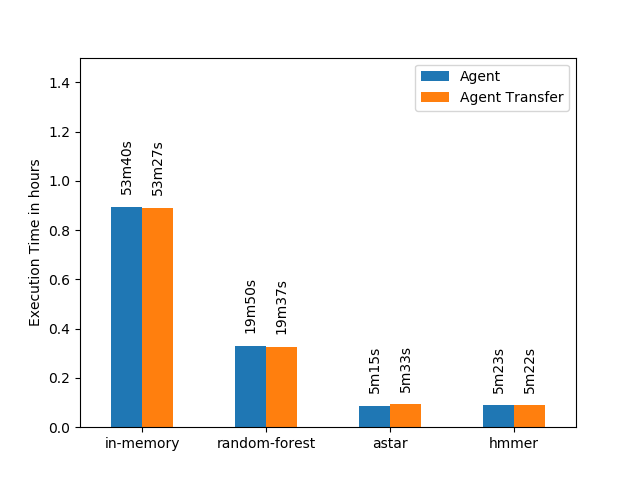

In [543]:
agent = [3221, 1191, 316, 324]
agent_transfer = [3207, 1177, 334, 323]

sec = 60 * 60

agent[:] = [x / sec for x in agent]
agent_transfer[:] = [x / sec for x in agent_transfer]

groups = [agent, agent_transfer]
group_labels = ['Agent', 'Agent Transfer']
bes_names = ['in-memory', 'random-forest', 'astar', 'hmmer']

# Convert data to pandas DataFrame.
df = pd.DataFrame(groups, index=group_labels, columns=bes_names ).T

ax = df.plot.bar(rot=0)
ax.set_ylim(0, 1.5)
plt.ylabel("Execution Time in hours")
autolabel_time(ax)


plt.show()

<IPython.core.display.Javascript object>


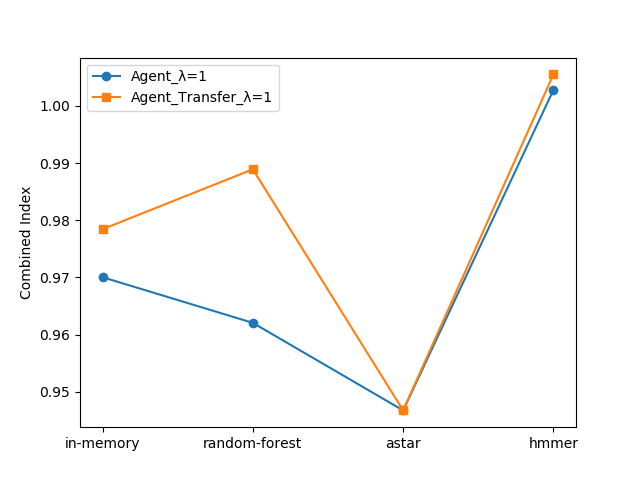

In [542]:
agent_l = [0.970035889475318, 0.962056675062972, 0.946754430379747, 1.00278549382716]

agent_transfer_l = [0.978427315247895, 0.9889, 0.946764071856287, 1.00548761609907]

bes_list = ['in-memory', 'random-forest', 'astar', 'hmmer']

plt.plot(agent_l, label='Αgent_λ=1', marker='o')
plt.plot(agent_transfer_l, label='Agent_Transfer_λ=1', marker="s")
plt.legend(loc="best")

plt.xticks(range(0, 4), bes_list, rotation=0) 
plt.ylabel("Combined Index")
plt.show()

<IPython.core.display.Javascript object>


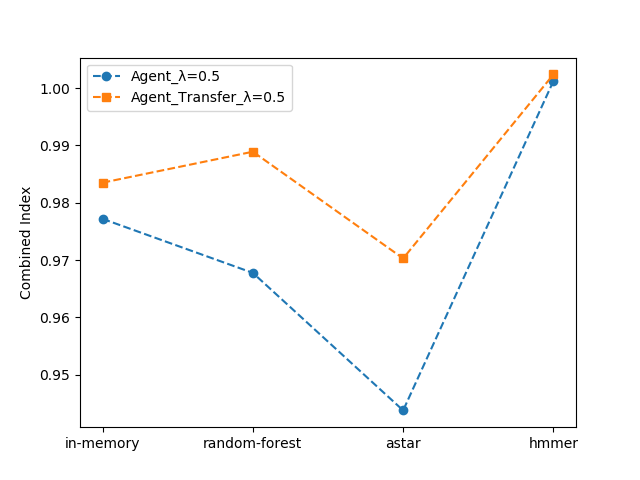

In [541]:
agent_l2 = [0.955881376341093, 0.950747864440906, 0.95274654702772, 1.00588051078342]

agent_l05 = [0.977191552153161, 0.967761423685509, 0.943772519255178, 1.00124155835593]

agent_transfer_l2 = [0.968359307326729, 0.9889, 0.901410104342214, 1.01171354561052]

agent_transfer_l05 = [0.983500505263759, 0.9889, 0.970289746959068, 1.00238903364303]

bes_list = ['in-memory', 'random-forest', 'astar', 'hmmer']

# plt.plot(agent_l, 'C0', label='Αgent_λ=2', marker='o')
# plt.plot(agent_transfer_l, 'C1', label='Agent_Transfer_λ=2', marker="s")

plt.plot(agent_l05, 'C0', label='Αgent_λ=0.5', marker='o', linestyle='--')
plt.plot(agent_transfer_l05, 'C1', label='Agent_Transfer_λ=0.5', marker="s", linestyle='--')

plt.legend(loc="best")
plt.ylabel("Combined Index")
plt.xticks(range(0, 4), bes_list, rotation=0) 

plt.show()

### Abliation

<IPython.core.display.Javascript object>


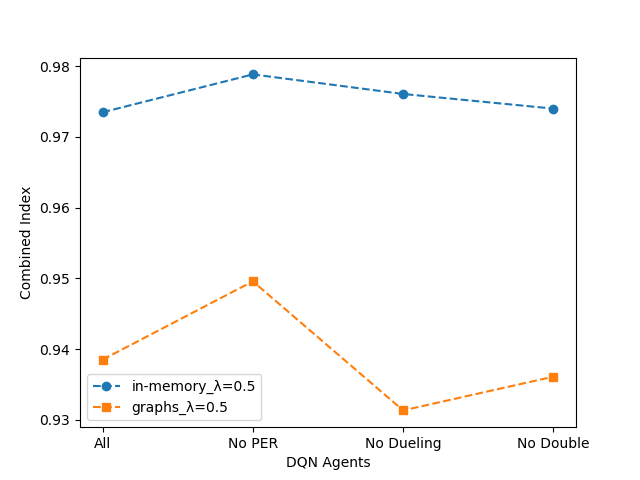

In [547]:
in_memory = [0.968020560747664, 0.974708528584817, 0.975156603773585, 0.972018826482585]

graphs = [0.924268552875696, 0.937344827586207, 0.91402994011976, 0.921474050046339]


in_memory_l05 = [0.973494801717997, 0.978845485048011, 0.976077866712893, 0.974007379154287]

graphs_l05 = [0.938524336866412, 0.949592398947007, 0.931350853960876, 0.936120623420972]


agent_list = ['All', 'No PER', 'No Dueling', 'No Double']

# plt.plot(in_memory, label='in-memory', marker='o')
# plt.plot(graphs, label='graphs', marker="s")
plt.plot(in_memory_l05, 'C0', label='in-memory_λ=0.5', marker='o', linestyle='--')
plt.plot(graphs_l05, 'C1', label='graphs_λ=0.5', marker="s", linestyle='--')
plt.legend(loc="best")

plt.xticks(range(0, 4), agent_list, rotation=0) 
plt.ylabel("Combined Index")
plt.xlabel("DQN Agents")
plt.show()

### Interval

<IPython.core.display.Javascript object>


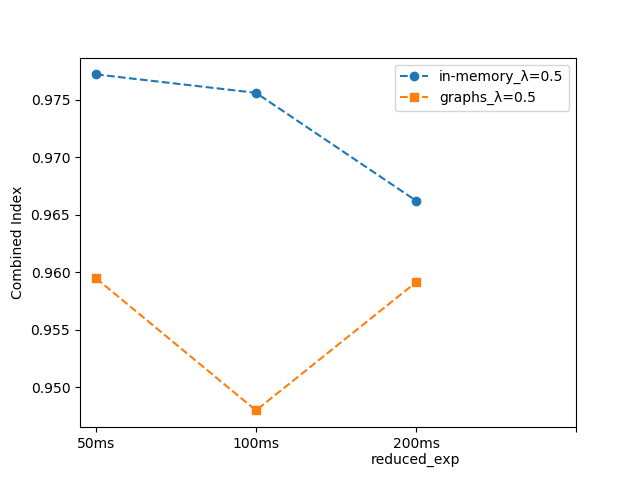

In [546]:
in_memory = [0.970035889475318, 0.967543786798884, 0.957205380333952]

graphs = [0.947088536812675, 0.929696688132475, 0.948728872250819]

in_memory_l05 = [0.977191552153161, 0.97558844964158, 0.966210332919134]

graphs_l05 = [0.959463421805084, 0.947968785746055,0.959107665767715]


agent_list = ['50ms', '100ms', '200ms\nreduced_exp']

# plt.plot(in_memory, label='in-memory', marker='o')
# plt.plot(graphs, label='graphs', marker="s")

plt.plot(in_memory_l05, 'C0', label='in-memory_λ=0.5', marker='o', linestyle='--')
plt.plot(graphs_l05, 'C1', label='graphs_λ=0.5', marker="s", linestyle='--')

plt.legend(loc="best")

plt.xticks(range(0, 4), agent_list, rotation=0) 
plt.ylabel("Combined Index")
# plt.xlabel("DQN Agents")
plt.show()

### Features

<IPython.core.display.Javascript object>


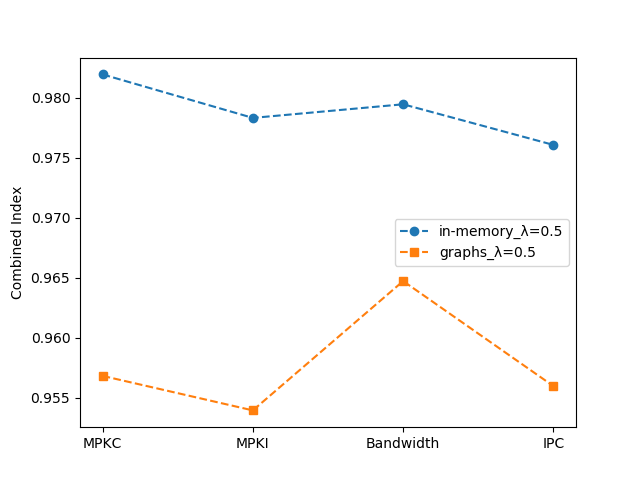

In [550]:
in_memory = [0.977469122697471, 0.9743188125, 0.974991757727131, 0.971622541367468]

graphs = [0.942064812239221, 0.937281578947368, 0.951604467194044, 0.944956121495327]

in_memory_l05 = [0.98192440779766, 0.978301267258072, 0.979435751046348, 0.976051177864564]

graphs_l05 = [0.956816902303714,
0.953942705302577,
0.964711961631955,
0.955963945501153
]

agent_list = ['MPKC', 'MPKI', 'Bandwidth', 'IPC']

# plt.plot(in_memory, label='in-memory', marker='o')
# plt.plot(graphs, label='graphs', marker="s")


plt.plot(in_memory_l05, 'C0', label='in-memory_λ=0.5', marker='o', linestyle='--')
plt.plot(graphs_l05, 'C1', label='graphs_λ=0.5', marker="s", linestyle='--')

plt.legend(loc="best")

plt.xticks(range(0, 4), agent_list, rotation=0) 
plt.ylabel("Combined Index")
# plt.xlabel("DQN Agents")
plt.show()

### Quantile

<IPython.core.display.Javascript object>


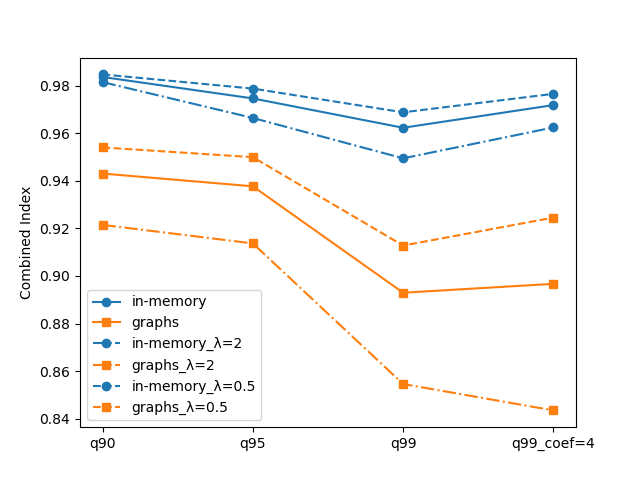

In [540]:
in_memory = [0.98373046211883, 0.974708528584817, 0.962362325147653, 0.97190751950078]

graphs = [0.943099626168224, 0.937734575955266, 0.892957482837529, 0.896693792172739]


in_memory_l2 = [0.981565698448654, 0.966486994604252, 0.949498918252611, 0.962506853945546]

graphs_l2 = [0.921505288933531, 0.913701303971324, 0.854541920646807, 0.843448816659109]


in_memory_l05 = [0.984814633625514, 0.978845485048011, 0.96885923226701, 0.976642227040212]

graphs_l05 = [0.954085823800757, 0.94998723986133, 0.912808099895974, 0.924563784753801]

agent_list = ['q90', 'q95', 'q99', 'q99_coef=4']

plt.plot(in_memory, label='in-memory', marker='o')
plt.plot(graphs, label='graphs', marker="s")

plt.plot(in_memory_l2, 'C0', label='in-memory_λ=2', marker='o', linestyle='dashdot')
plt.plot(graphs_l2, 'C1', label='graphs_λ=2', marker="s", linestyle='dashdot')

plt.plot(in_memory_l05, 'C0', label='in-memory_λ=0.5', marker='o', linestyle='--')
plt.plot(graphs_l05, 'C1', label='graphs_λ=0.5', marker="s", linestyle='--')
plt.legend(loc="best")

plt.xticks(range(0, 4), agent_list, rotation=0) 
plt.ylabel("Combined Index")
#
plt.show()

<IPython.core.display.Javascript object>


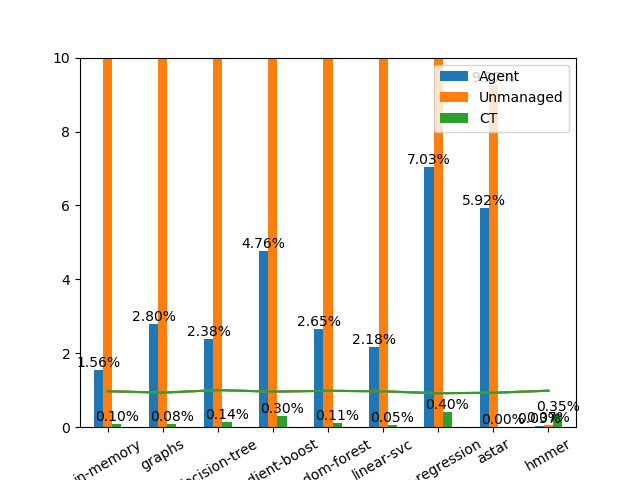

In [373]:
ct = [0.1, 0.08, 0.14, 0.3, 0.11, 0.05, 0.4, 0, 0.35]
unmanaged = [38.56, 99.99, 99.92, 99.95, 97.19, 99.99, 99.75, 9.27]
agent = [1.56, 2.80, 2.38, 4.76, 2.65, 2.18, 7.03, 5.92, 0.03]

groups = [agent, unmanaged, ct]
group_labels = ['Agent', 'Unmanaged', 'CT']
bes_names = ['in-memory', 'graphs', 'decision-tree', 'gradient-boost',
             'random-forest', 'linear-svc', 'log-regression', 'astar', 'hmmer']

# Convert data to pandas DataFrame.
df = pd.DataFrame(groups, index=group_labels, columns=bes_names ).T

ax = df.plot.bar(rot=30)
ax.set_ylim(0,10)

autolabel(ax)
# Plot.
# pd.concat(
#     [df.mean().rename('average'),
#      df.min().rename('min'), 
#      df.max().rename('max')],
#     axis=1).